In [124]:
import sklearn
from sklearn import metrics
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random 
import warnings
warnings.filterwarnings("ignore")

# KMEAN for random data

In [125]:
data_1 = np.array([[random.randint(1, 400) for i in range(2)] for j in range(300)], 
                       dtype=np.float64)

data_2 = np.array([[random.randint(300, 700) for i in range(2)] for j in range(300)], 
                       dtype=np.float64)

data_3 = np.array([[random.randint(600, 900) for i in range(2)] for j in range(400)], 
                       dtype=np.float64)

data = np.append(np.append(data_1, data_2, axis=0), data_3, axis=0)
data

array([[ 67.,  92.],
       [160., 225.],
       [318., 197.],
       ...,
       [895., 835.],
       [882., 725.],
       [642., 654.]])

In [126]:
data.shape

(1000, 2)

In [127]:
data.dtype

dtype('float64')

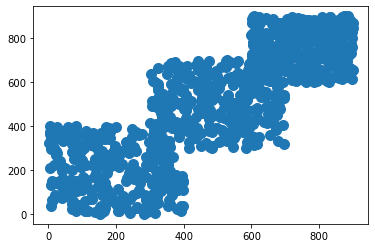

In [128]:
fig, ax = plt.subplots(figsize=(6, 4))

plt.scatter(data[:,0], data[:,1], s=100)

In [129]:
labels_1 = np.array([0 for i in range(300)])

labels_2 = np.array([1 for i in range(300)])

labels_3 = np.array([2 for i in range(400)])

labels = np.append(np.append(labels_1, labels_2, axis=0), labels_3, axis=0)
df = pd.DataFrame({'data_x': data[:,0], 'data_y': data[:,1], 'labels': labels})

df.sample(15)

,data_x,data_y,labels
297,343.0,266.0,0
622,822.0,884.0,2
868,767.0,683.0,2
640,661.0,663.0,2
740,831.0,777.0,2
50,167.0,27.0,0
974,679.0,740.0,2
624,859.0,880.0,2
649,734.0,805.0,2
998,882.0,725.0,2


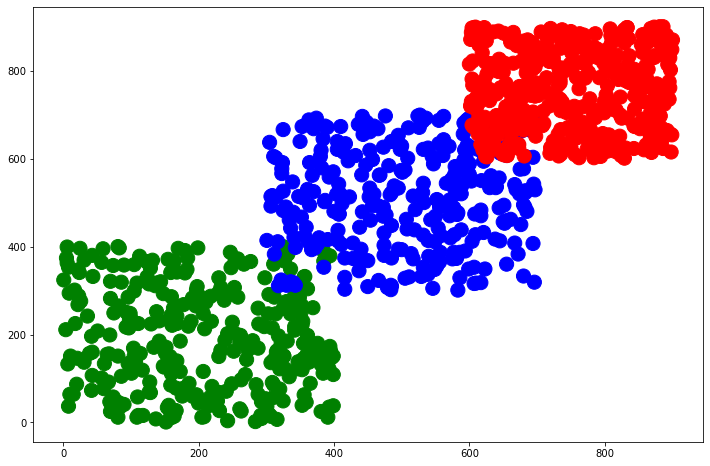

In [130]:
colors = ['green','blue','red']

plt.figure(figsize=(12, 8))

plt.scatter(df['data_x'], df['data_y'], c=df['labels'], s=200, 
            cmap=matplotlib.colors.ListedColormap(colors))

In [131]:
kmeans_model = KMeans(n_clusters=3, max_iter=20000).fit(data)
kmeans_model.labels_

array([1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [132]:
centroids = kmeans_model.cluster_centers_

centroids

array([[744.2464455 , 745.83412322],
       [200.57142857, 190.77076412],
       [497.79783394, 500.67148014]])

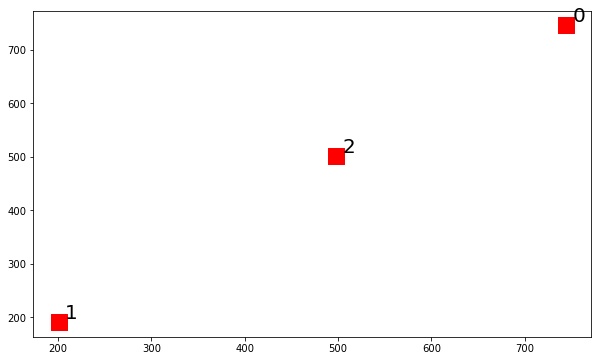

In [133]:
fig, ax = plt.subplots(figsize=(10, 6))

plt.scatter(centroids[:,0], centroids[:,1], c='r', s=250, marker='s')

for i in range(len(centroids)):
    plt.annotate( i, (centroids[i][0] + 7, centroids[i][1] + 7), fontsize=20)

In [134]:
print("Homogeneity_score: ", metrics.homogeneity_score(labels, kmeans_model.labels_))

print("Completeness_score: ", metrics.completeness_score(labels, kmeans_model.labels_))

print("v_measure_score: ", metrics.v_measure_score(labels, kmeans_model.labels_))

print("Adjusted_rand_score: ", metrics.adjusted_rand_score(labels, kmeans_model.labels_))

print("Adjusted_mutual_info_score: ", metrics.adjusted_mutual_info_score(labels,  kmeans_model.labels_))

print("Silhouette_score: ", metrics.silhouette_score(data, kmeans_model.labels_))

Homogeneity_score:  0.8440956046394393
Completeness_score:  0.8501466053260729
v_measure_score:  0.8471102993821478
Adjusted_rand_score:  0.8862589042345226
Adjusted_mutual_info_score:  0.8468271574729441
Silhouette_score:  0.4992331754338687


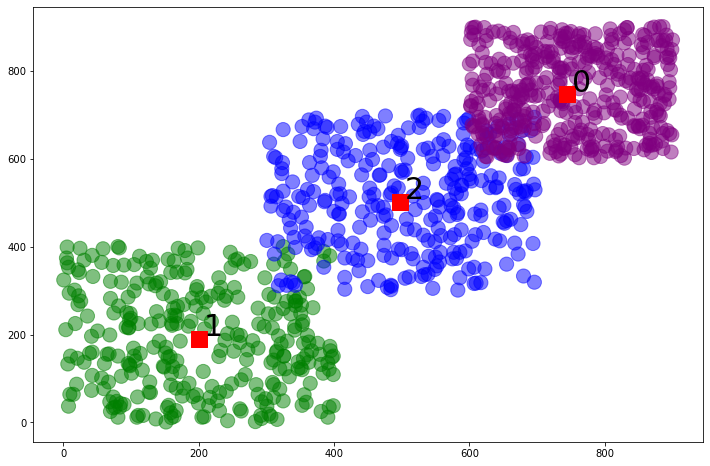

In [135]:
colors = ['green','blue','purple']

plt.figure(figsize=(12, 8))

plt.scatter(df['data_x'], df['data_y'], c=df['labels'], s=200,
            cmap=matplotlib.colors.ListedColormap(colors), alpha=0.5)

plt.scatter(centroids[:,0], centroids[:,1], c='r', s=250, marker='s')

for i in range(len(centroids)):
    plt.annotate( i, (centroids[i][0] + 7, centroids[i][1] + 7), fontsize=30)

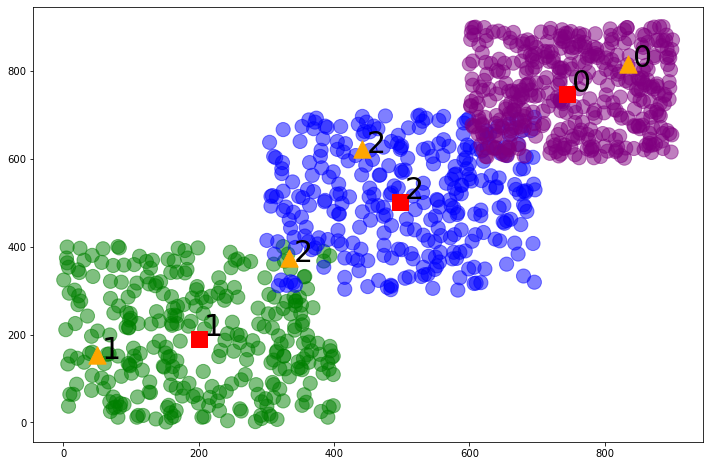

In [136]:
data_test = np.array([[442., 621.],
                      [ 50., 153.],
                      [ 333., 373.],
                      [835., 816.]])
label_pred = kmeans_model.predict(data_test)
colors = ['green','blue','purple']

plt.figure(figsize=(12, 8))

plt.scatter(df['data_x'], df['data_y'], c=df['labels'], s=200,
            cmap=matplotlib.colors.ListedColormap(colors), alpha=0.5)
    
plt.scatter(data_test[:,0], data_test[:,1], c='orange', s=300, marker='^')

for i in range(len(label_pred)):
    plt.annotate(label_pred[i], (data_test[i][0] + 7, data_test[i][1] - 7), fontsize=30)
    
plt.scatter(centroids[:,0], centroids[:,1], c='r', s=250, marker='s')

for i in range(len(centroids)):
    plt.annotate( i, (centroids[i][0] + 7, centroids[i][1] + 7), fontsize=30)

#  kmean for iris dataset

In [193]:
iris_df = pd.read_csv('iris.csv', 
                      skiprows=1, 
                      names = ['sepal-length',
                               'sepal-width',
                               'petal-length',
                               'petal-width',
                               'class'])
iris_df

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [194]:
iris_df[iris_df.isnull().any(axis=1)]

,sepal-length,sepal-width,petal-length,petal-width,class


In [195]:
iris_df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [196]:
from sklearn import preprocessing

label_encoding = preprocessing.LabelEncoder()

iris_df['class'] = label_encoding.fit_transform(iris_df['class'].astype(str))

iris_df.sample(20)

,sepal-length,sepal-width,petal-length,petal-width,class
103,6.3,2.9,5.6,1.8,2
18,5.7,3.8,1.7,0.3,0
32,5.2,4.1,1.5,0.1,0
87,6.3,2.3,4.4,1.3,1
128,6.4,2.8,5.6,2.1,2
64,5.6,2.9,3.6,1.3,1
40,5.0,3.5,1.3,0.3,0
123,6.3,2.7,4.9,1.8,2
88,5.6,3.0,4.1,1.3,1
115,6.4,3.2,5.3,2.3,2


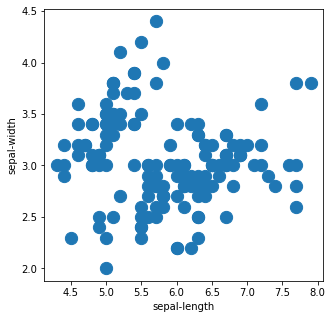

In [197]:
fig, ax = plt.subplots(figsize=(5, 5))

plt.scatter(iris_df['sepal-length'], iris_df['sepal-width'], s=150)

plt.xlabel('sepal-length')
plt.ylabel('sepal-width')

plt.show()

In [198]:
iris_2D = iris_df[['sepal-length', 'petal-length']]

iris_2D.sample(5)

,sepal-length,petal-length
47,4.6,1.4
37,4.9,1.5
110,6.5,5.1
46,5.1,1.6
61,5.9,4.2


In [199]:
iris_2D = np.array(iris_2D)
kmeans_model_2D = KMeans(n_clusters=3, max_iter=1000).fit(iris_2D)
kmeans_model_2D.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [200]:
centroids_2D = kmeans_model_2D.cluster_centers_

centroids_2D

array([[5.87413793, 4.39310345],
       [5.00784314, 1.49411765],
       [6.83902439, 5.67804878]])

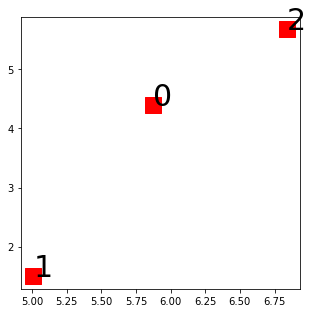

In [201]:
fig, ax = plt.subplots(figsize=(5, 5))

plt.scatter(centroids_2D[:,0], centroids_2D[:,1], c='r', s=250, marker='s')
for i in range(len(centroids_2D)):
    plt.annotate(i, (centroids_2D[i][0], centroids_2D[i][1]), fontsize=30)


In [202]:
iris_labels = iris_df['class']
iris_labels

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: class, Length: 150, dtype: int32

In [203]:
print("Homogeneity_score: ", metrics.homogeneity_score(iris_labels, kmeans_model_2D.labels_))

print("Completeness_score: ", metrics.completeness_score(iris_labels, kmeans_model_2D.labels_))

print("v_measure_score: ", metrics.v_measure_score(iris_labels, kmeans_model_2D.labels_))

print("Adjusted_rand_score: ", metrics.adjusted_rand_score(iris_labels, kmeans_model_2D.labels_))

print("Adjusted_mutual_info_score: ", metrics.adjusted_mutual_info_score(iris_labels,  kmeans_model_2D.labels_))

print("Silhouette_score: ", metrics.silhouette_score(iris_2D, kmeans_model_2D.labels_))

Homogeneity_score:  0.7033177646052958
Completeness_score:  0.7096993707802843
v_measure_score:  0.706494157075837
Adjusted_rand_score:  0.6988627672348092
Adjusted_mutual_info_score:  0.7028024531409133
Silhouette_score:  0.5890612473833902


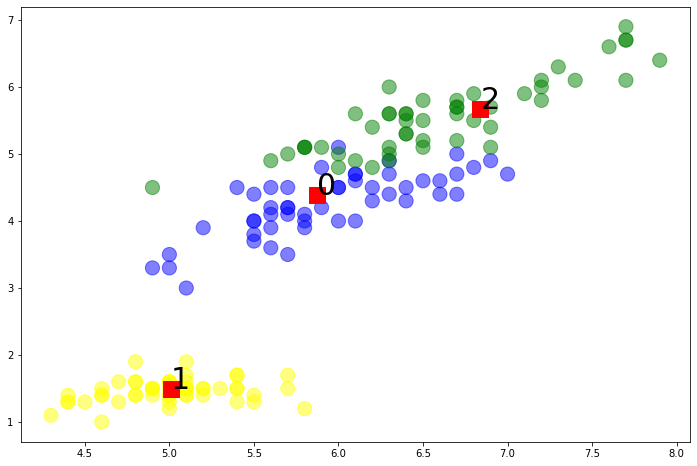

In [204]:
colors = ['yellow','blue','green']

plt.figure(figsize=(12, 8))

plt.scatter(iris_df['sepal-length'], iris_df['petal-length'], c=iris_df['class'], s=200,
            cmap=matplotlib.colors.ListedColormap(colors), alpha=0.5)

plt.scatter(centroids_2D[:,0], centroids_2D[:,1], c='r', s=250, marker='s')

for i in range(len(centroids_2D)):
    plt.annotate( i, (centroids_2D[i][0], centroids_2D[i][1]), fontsize=30)



# multiple clustering

In [209]:
iris_features = iris_df.drop('class', axis=1)

In [226]:
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift
from sklearn.cluster import Birch
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MiniBatchKMeans

In [227]:
def build_model(clustering_model, data, labels):
    
    model = clustering_model(data)

    print('homo\tcompl\tv-meas\tARI\tAMI\tsilhouette')
    print(50 * '-')
    
    print('%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          %(metrics.homogeneity_score(labels, model.labels_),
            metrics.completeness_score(labels, model.labels_),
            metrics.v_measure_score(labels, model.labels_),
            metrics.adjusted_rand_score(labels, model.labels_),
            metrics.adjusted_mutual_info_score(labels,  model.labels_),
            metrics.silhouette_score(data, model.labels_)))

In [228]:
def k_means(data, n_clusters=3, max_iter=1000):
    model = KMeans(n_clusters=n_clusters, max_iter=max_iter).fit(data)
    
    return model

In [213]:
build_model(k_means, iris_features, iris_labels)

homo	compl	v-meas	ARI	AMI	silhouette
--------------------------------------------------
0.751	0.765	0.758	0.730	0.755	0.553


In [214]:
def agglomerative_fn(data, n_clusters=3):
    model = AgglomerativeClustering(n_clusters = n_clusters).fit(data)
    
    return model

In [215]:
build_model(agglomerative_fn, iris_features, iris_labels)

homo	compl	v-meas	ARI	AMI	silhouette
--------------------------------------------------
0.761	0.780	0.770	0.731	0.767	0.554


In [216]:
def dbscan_fn(data, eps=0.45, min_samples=4):
    model = DBSCAN(eps=eps, min_samples=min_samples).fit(data)
    return model

In [217]:
build_model(dbscan_fn, iris_features, iris_labels)

homo	compl	v-meas	ARI	AMI	silhouette
--------------------------------------------------
0.577	0.609	0.593	0.508	0.584	0.372


In [218]:
def mean_shift_fn(data, bandwidth=0.85):
    model = MeanShift(bandwidth=bandwidth).fit(data)
    return model

In [219]:
build_model(mean_shift_fn, iris_features, iris_labels)

homo	compl	v-meas	ARI	AMI	silhouette
--------------------------------------------------
0.760	0.772	0.766	0.744	0.763	0.551


In [220]:
def birch_fn(data, n_clusters=3):
    model = Birch(n_clusters=n_clusters).fit(data)
    return model

In [221]:
build_model(birch_fn, iris_features, iris_labels)

homo	compl	v-meas	ARI	AMI	silhouette
--------------------------------------------------
0.675	0.738	0.705	0.610	0.701	0.502


In [222]:
def affinity_propagation_fn(data, damping=0.6, max_iter=1000):
    model = AffinityPropagation(damping=damping, max_iter=max_iter).fit(data)
    return model

In [223]:
build_model(affinity_propagation_fn, iris_features, iris_labels)

homo	compl	v-meas	ARI	AMI	silhouette
--------------------------------------------------
0.851	0.492	0.623	0.437	0.612	0.349


In [224]:
def mini_batch_kmeans_fn(data, n_clusters=3, max_iter=1000):
    model = MiniBatchKMeans(n_clusters=n_clusters, max_iter=max_iter, batch_size=20).fit(data)
    return model

In [225]:
build_model(mini_batch_kmeans_fn, iris_features, iris_labels)

homo	compl	v-meas	ARI	AMI	silhouette
--------------------------------------------------
0.761	0.780	0.770	0.731	0.767	0.520
